In [1]:
import pandas as pd
import numpy as np
import math
import ipywidgets as widgets

import matplotlib.pyplot as plt
import seaborn as sns
import scipy
plt.rcParams["figure.figsize"] = (8,8)

In [2]:
df = pd.read_csv("data/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


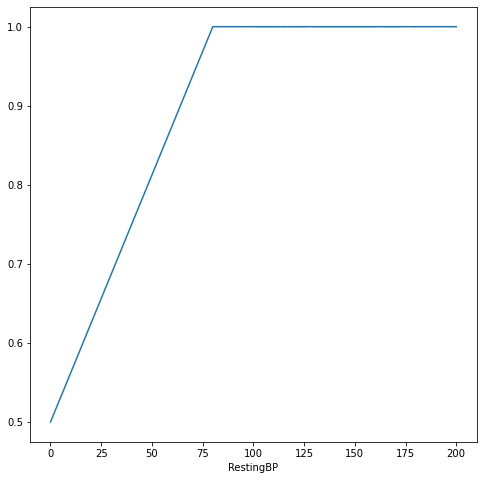

In [3]:
x = pd.Series(df['RestingBP'])
norm_cdf = scipy.stats.norm.cdf(x) # calculate the cdf - also discrete


sns.lineplot(x=x, y=norm_cdf)
plt.show()

In [4]:
prob = scipy.stats.probplot(x)
plt.show()

In [5]:
#This function does the same work as the one we made last time - it does 6 graphs all in bulk: Hist, PMF, CDF, PDF, normal and lognormal prob plots. 
#One addition is the rnd=0 thing. That's how we can make one of those optional paramaters, if you don't provide anything there, the hist will have no
#rounding; if you provide a number, the histogram will round to that many digits. 
def bigGraph(df, columnName, rnd=0):
    data = pd.Series(df[columnName])
    hist = sns.displot(data)
    plt.subplot(2)
    cdf = scipy.stats.norm.cdf(data)
    sns.lineplot(x=x, y=norm_cdf)
    return

ValueError: Single argument to subplot must be a three-digit integer, not 2

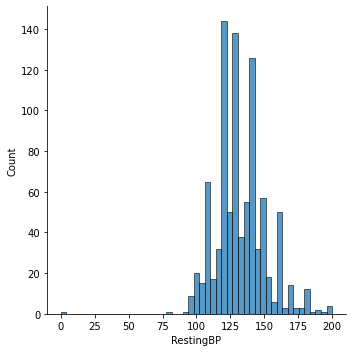

In [6]:
bigGraph(df, 'RestingBP')

In [ ]:
def doublehist(df1, df2, columnName):
    sns.distplot(df1[columnName], color="purple")
    sns.distplot(df2[columnName], color="green")
    plt.show()
    return

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
yesangina = df[df['ExerciseAngina']=='Y']
noangina = df[df['ExerciseAngina']== 'N']

In [ ]:
def numericstats(df):
    val = df.value_counts()
    sort = print('Value Counts:\n',val.sort_values(ascending=False))
    desc = print('Full description:\n ', df.describe(include="all"))
    return sort, desc

In [ ]:
def look(df):
    head = df.head()
    tail = df.tail()
    return head, tail

In [ ]:

def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [9]:
def heatmap(df):
    df2 = df.apply(pd.to_numeric, errors='coerce')
    df2 = df2.drop(columns=["age"])
    df2 = df2.corr()
    plt.rcParams["figure.figsize"] = (20,10)
    mask = np.triu(np.ones_like(df, dtype=bool))
    sns.heatmap(df, center=0, linewidths=.5, annot=True, cmap="YlGnBu", yticklabels=True, mask=mask)
    plt.show()
    return

In [13]:
if df[columnName]=='object'
    df.drop(columns={'columnName'})

dtype('int64')